In [ ]:
# --- PREPARATION: IMPORT LIBRARIES ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
df = files.upload()

Saving cleaned_employee_data.csv to cleaned_employee_data (1).csv
Saving Extended_Employee_Performance_and_Productivity_Data.csv to Extended_Employee_Performance_and_Productivity_Data (1).csv


In [ ]:
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")
original_df = pd.read_csv('cleaned_employee_data.csv')

In [ ]:
df.head()

Employee_ID        Department  Gender  Age   Job_Title  \
0            1                IT    Male   55  Specialist   
1            2           Finance    Male   29   Developer   
2            3           Finance    Male   55  Specialist   
3            4  Customer Support  Female   48     Analyst   
4            5       Engineering  Female   36     Analyst   

                    Hire_Date  Years_At_Company Education_Level  \
0  2022-01-19 08:03:05.556036                 2     High School   
1  2024-04-18 08:03:05.556036                 0     High School   
2  2015-10-26 08:03:05.556036                 8     High School   
3  2016-10-22 08:03:05.556036                 7        Bachelor   
4  2021-07-23 08:03:05.556036                 3        Bachelor   

   Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
0                  5          6750.0                   33                32   
1                  5          7500.0                   34                34   
2                  3          5850.0                   37                27   
3                  2          4800.0                   52                10   
4                  2          4800.0                   38                11   

   Overtime_Hours  Sick_Days  Remote_Work_Frequency  Team_Size  \
0              22          2                      0         14   
1              13         14                    100         12   
2               6          3                     50         10   
3              28         12                    100         10   
4              29         13                    100         15   

   Training_Hours  Promotions  Employee_Satisfaction_Score  Resigned  
0              66           0                         2.63     False  
1              61           2                         1.72     False  
2               1           0                         3.17     False  
3               0           1                         1.86     False  
4               9           1                         1.25     False

In [ ]:
df.shape

(100000, 20)

In [ ]:
df.isna().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [ ]:
df.describe()

Employee_ID            Age  Years_At_Company  Performance_Score  \
count  100000.000000  100000.000000     100000.000000      100000.000000   
mean    50000.500000      41.029410          4.476070           2.995430   
std     28867.657797      11.244121          2.869336           1.414726   
min         1.000000      22.000000          0.000000           1.000000   
25%     25000.750000      31.000000          2.000000           2.000000   
50%     50000.500000      41.000000          4.000000           3.000000   
75%     75000.250000      51.000000          7.000000           4.000000   
max    100000.000000      60.000000         10.000000           5.000000   

       Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  Overtime_Hours  \
count   100000.000000        100000.000000     100000.000000   100000.000000   
mean      6403.211000            44.956950         24.431170       14.514930   
std       1372.508717             8.942003         14.469584        8.664026   
min       3850.000000            30.000000          0.000000        0.000000   
25%       5250.000000            37.000000         12.000000        7.000000   
50%       6500.000000            45.000000         24.000000       15.000000   
75%       7500.000000            53.000000         37.000000       22.000000   
max       9000.000000            60.000000         49.000000       29.000000   

           Sick_Days  Remote_Work_Frequency      Team_Size  Training_Hours  \
count  100000.000000          100000.000000  100000.000000   100000.000000   
mean        7.008550              50.090500      10.013560       49.506060   
std         4.331591              35.351157       5.495405       28.890383   
min         0.000000               0.000000       1.000000        0.000000   
25%         3.000000              25.000000       5.000000       25.000000   
50%         7.000000              50.000000      10.000000       49.000000   
75%        11.000000              75.000000      15.000000       75.000000   
max        14.000000             100.000000      19.000000       99.000000   

          Promotions  Employee_Satisfaction_Score  
count  100000.000000                100000.000000  
mean        0.999720                     2.999088  
std         0.815872                     1.150719  
min         0.000000                     1.000000  
25%         0.000000                     2.010000  
50%         1.000000                     3.000000  
75%         2.000000                     3.990000  
max         2.000000                     5.000000

In [ ]:
# Drop Employee_ID as it's a unique identifier and not a predictive feature
df = df.drop('Employee_ID', axis=1)

# Convert 'Hire_Date' to datetime objects (though 'Years_At_Company' is already derived)
# This step is shown for good practice if you needed to calculate tenure or other date-based features
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])

In [ ]:
df.head()

Department  Gender  Age   Job_Title                  Hire_Date  \
0                IT    Male   55  Specialist 2022-01-19 08:03:05.556036   
1           Finance    Male   29   Developer 2024-04-18 08:03:05.556036   
2           Finance    Male   55  Specialist 2015-10-26 08:03:05.556036   
3  Customer Support  Female   48     Analyst 2016-10-22 08:03:05.556036   
4       Engineering  Female   36     Analyst 2021-07-23 08:03:05.556036   

   Years_At_Company Education_Level  Performance_Score  Monthly_Salary  \
0                 2     High School                  5          6750.0   
1                 0     High School                  5          7500.0   
2                 8     High School                  3          5850.0   
3                 7        Bachelor                  2          4800.0   
4                 3        Bachelor                  2          4800.0   

   Work_Hours_Per_Week  Projects_Handled  Overtime_Hours  Sick_Days  \
0                   33                32              22          2   
1                   34                34              13         14   
2                   37                27               6          3   
3                   52                10              28         12   
4                   38                11              29         13   

   Remote_Work_Frequency  Team_Size  Training_Hours  Promotions  \
0                      0         14              66           0   
1                    100         12              61           2   
2                     50         10               1           0   
3                    100         10               0           1   
4                    100         15               9           1   

   Employee_Satisfaction_Score  Resigned  
0                         2.63     False  
1                         1.72     False  
2                         3.17     False  
3                         1.86     False  
4                         1.25     False

/tmp/ipython-input-1925518067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Performance_Score', palette='viridis')


Text(0, 0.5, 'Number of Employees')

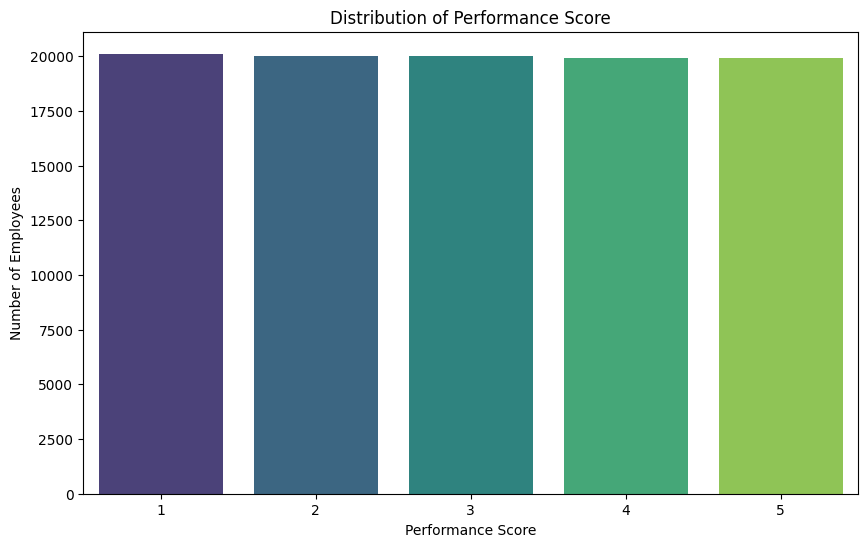

In [ ]:
# Distribution of Performance_Score
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Performance_Score', palette='viridis')
plt.title('Distribution of Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Number of Employees')

/tmp/ipython-input-1286090786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Department', order = df['Department'].value_counts().index, palette='viridis')


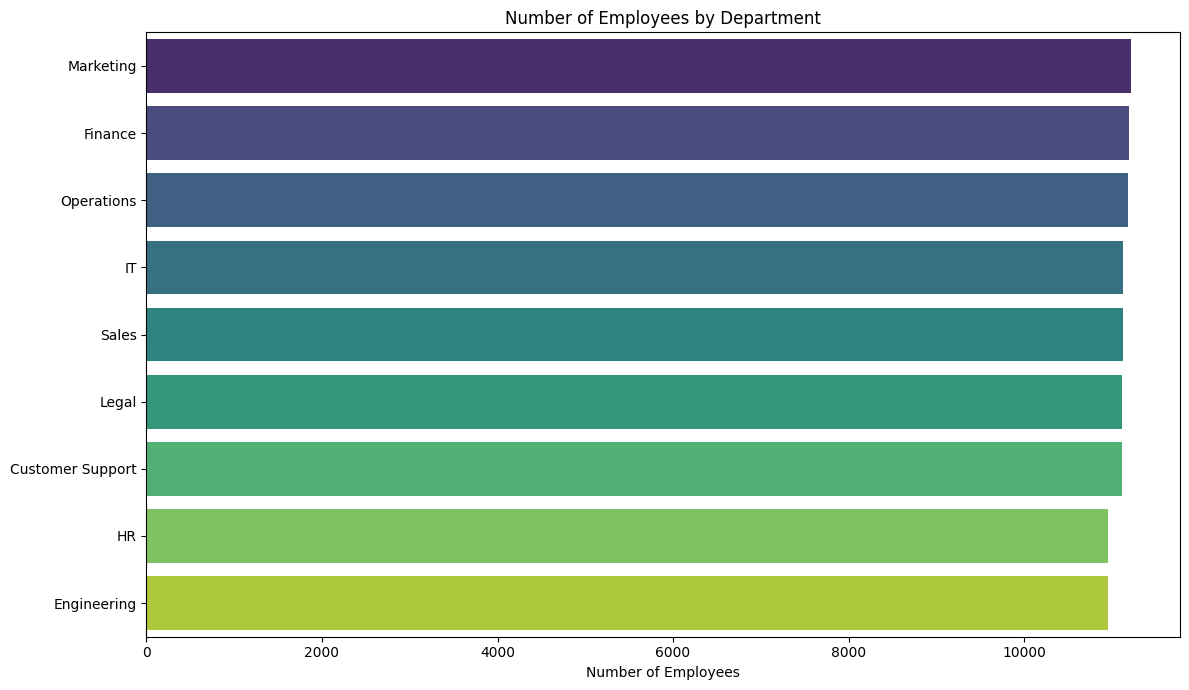

In [ ]:
# Number of employees by Department
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='Department', order = df['Department'].value_counts().index, palette='viridis')
plt.title('Number of Employees by Department')
plt.xlabel('Number of Employees')
plt.ylabel('')
plt.tight_layout()

**Normalization / Scaling**

In [ ]:
# Identify numerical columns for scaling
numerical_cols = [
    'Age', 'Years_At_Company', 'Monthly_Salary', 'Work_Hours_Per_Week',
    'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency',
    'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\n--- Data after Standardization (First 5 rows) ---")
print(df[numerical_cols].head())


--- Data after Standardization (First 5 rows) ---
        Age  Years_At_Company  Monthly_Salary  Work_Hours_Per_Week  \
0  1.242486         -0.862946        0.252669            -1.337174   
1 -1.069845         -1.559975        0.799117            -1.225341   
2  1.242486          1.228140       -0.403068            -0.889844   
3  0.619935          0.879626       -1.168094             0.787641   
4 -0.447295         -0.514432       -1.168094            -0.778012   

   Projects_Handled  Overtime_Hours  Sick_Days  Remote_Work_Frequency  \
0          0.523088        0.863929  -1.156290              -1.416948   
1          0.661310       -0.174854   1.614068               1.411828   
2          0.177534       -0.982796  -0.925427              -0.002560   
3         -0.997350        1.556452   1.152342               1.411828   
4         -0.928239        1.671872   1.383205               1.411828   

   Team_Size  Training_Hours  Promotions  Employee_Satisfaction_Score  
0   0.725417     

=> I used StandardScaler to normalize the numerical features. This ensures that each feature has a mean of 0 and a standard deviation of 1, preventing the model from being biased towards features with larger scales.

**Feature Engineering**

In [ ]:
# Create a new 'Workload' feature
df['Workload'] = df['Work_Hours_Per_Week'] + df['Overtime_Hours']

print("\n--- Data with the new 'Workload' feature (First 5 rows) ---")
print(df[['Work_Hours_Per_Week', 'Overtime_Hours', 'Workload']].head())


--- Data with the new 'Workload' feature (First 5 rows) ---
   Work_Hours_Per_Week  Overtime_Hours  Workload
0            -1.337174        0.863929 -0.473244
1            -1.225341       -0.174854 -1.400195
2            -0.889844       -0.982796 -1.872641
3             0.787641        1.556452  2.344092
4            -0.778012        1.671872  0.893860


=> I performed feature engineering by creating a 'Workload' attribute, which is the sum of work hours and overtime hours. This feature might better reflect an employee's job pressure.

/tmp/ipython-input-1250902740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=original_df, x='Monthly_Salary', y='Education_Level', palette='viridis')


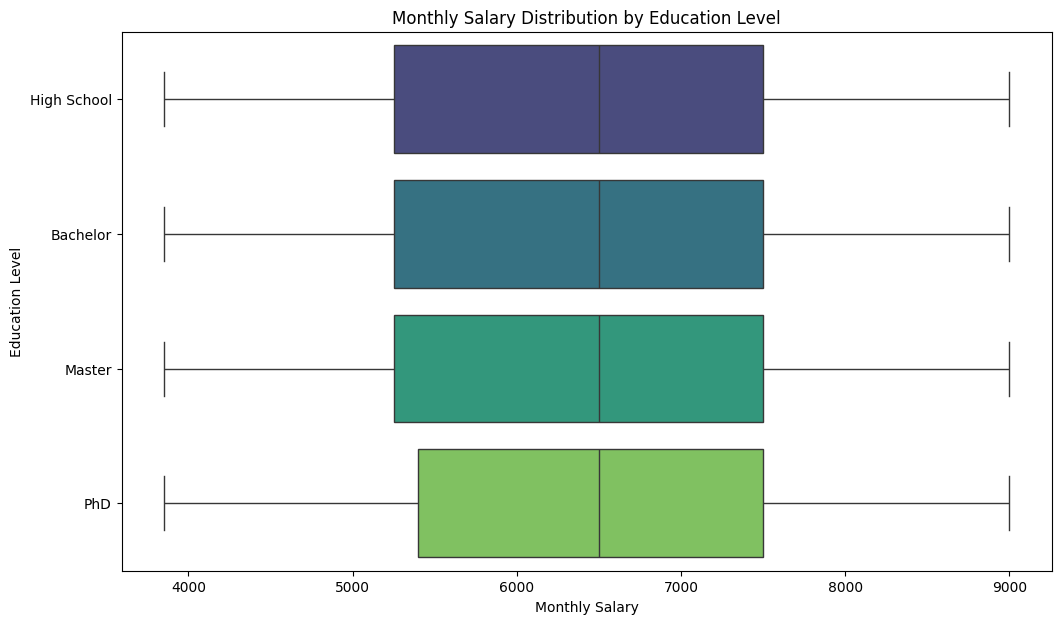

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=original_df, x='Monthly_Salary', y='Education_Level', palette='viridis')
plt.title('Monthly Salary Distribution by Education Level')
plt.xlabel('Monthly Salary')
plt.ylabel('Education Level')
plt.show()

/tmp/ipython-input-417586918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=original_df, x='Performance_Score', y='Monthly_Salary', palette='plasma')


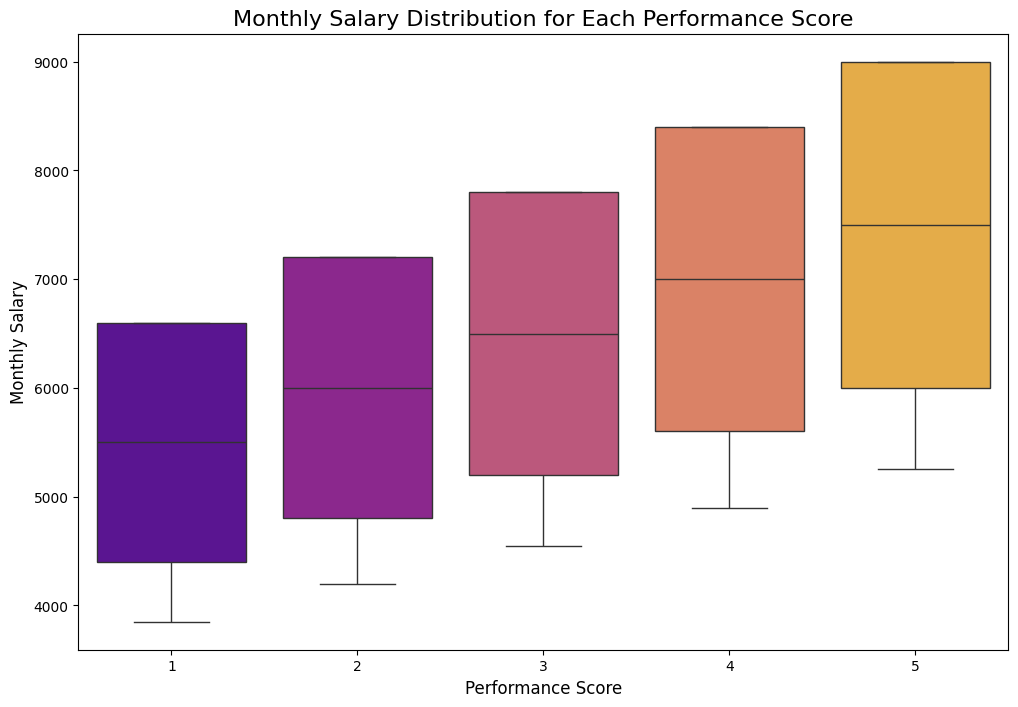

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=original_df, x='Performance_Score', y='Monthly_Salary', palette='plasma')
plt.title('Monthly Salary Distribution for Each Performance Score', fontsize=16)
plt.xlabel('Performance Score', fontsize=12)
plt.ylabel('Monthly Salary', fontsize=12)
plt.show()

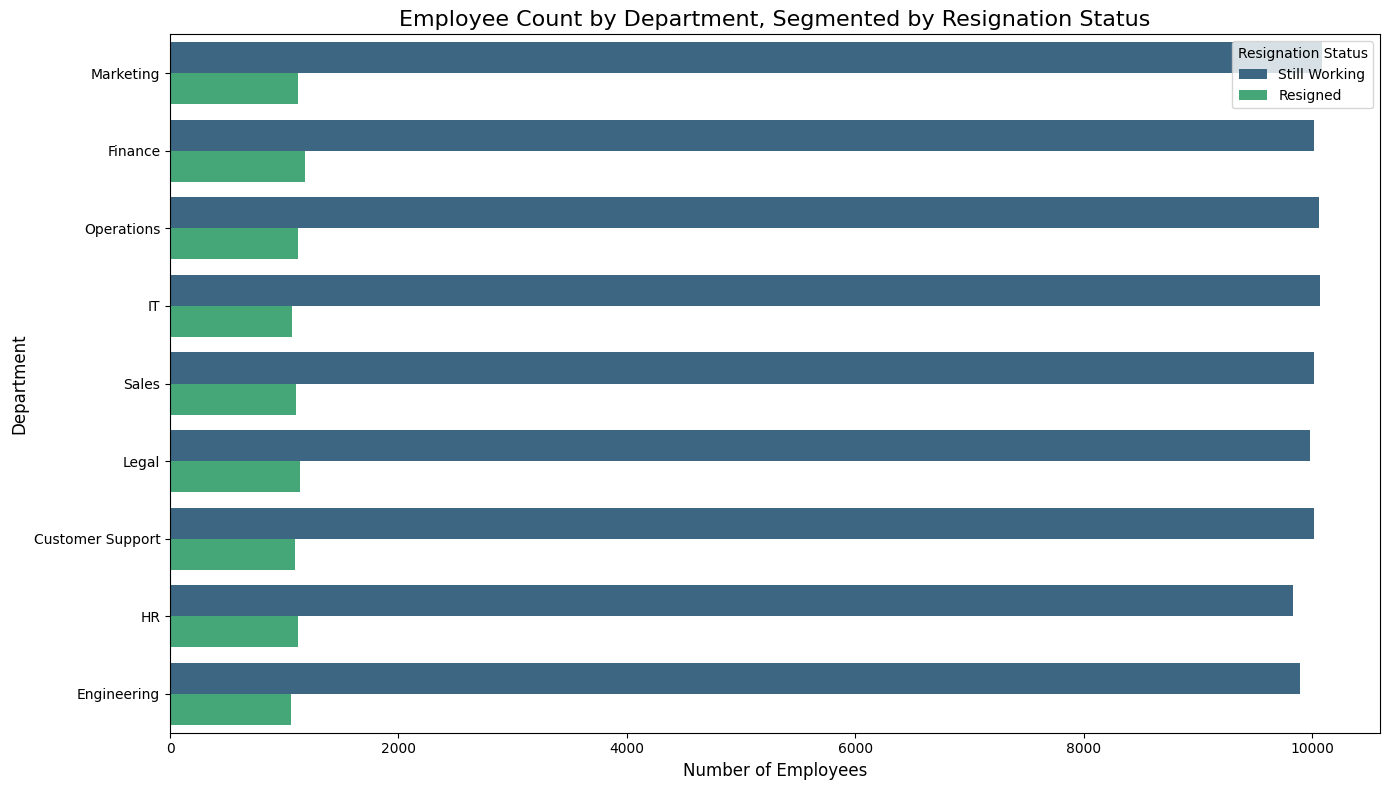

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=original_df, y='Department', hue='Resigned', palette='viridis', order=df['Department'].value_counts().index)
plt.title('Employee Count by Department, Segmented by Resignation Status', fontsize=16)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.legend(title='Resignation Status', labels=['Still Working', 'Resigned'])
plt.tight_layout()
plt.show()

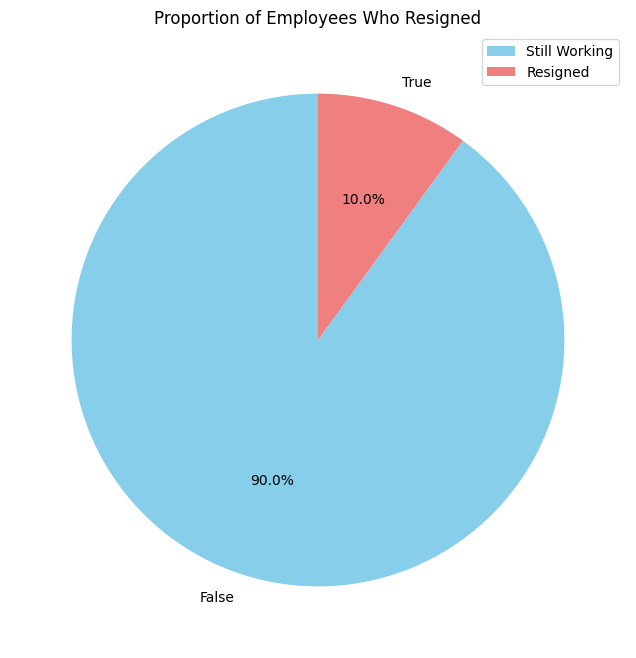

In [ ]:
resigned_counts = df['Resigned'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(resigned_counts, labels=resigned_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Employees Who Resigned')
plt.legend(['Still Working', 'Resigned'])
plt.show()

=> Gần 10% nhân viên trong bộ dữ liệu này đã nghỉ việc.

**Model #1: Regression (Predicting Performance Score)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 1. Prepare data (handle categorical variables)
df_processed = pd.get_dummies(df, columns=['Department', 'Gender', 'Education_Level', 'Job_Title'], drop_first=True)
df_processed = df_processed.drop(columns=['Hire_Date', 'Resigned']) # Drop unnecessary columns

# Select features (X) and target (y)
X_reg = df_processed.drop('Performance_Score', axis=1)
y_reg = df_processed['Performance_Score']

# 2. Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 3. Build and Train the model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# 4. Evaluate the model
y_pred_reg = reg_model.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\n--- REGRESSION MODEL RESULTS (PREDICTING PERFORMANCE SCORE) ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")


--- REGRESSION MODEL RESULTS (PREDICTING PERFORMANCE SCORE) ---
Mean Squared Error (MSE): 0.0644
R-squared (R2 Score): 0.9679


**Model #2: Classification (Predicting Employee Resignation)**

In [ ]:
from sklearn.metrics import accuracy_score

df_clf_processed = pd.get_dummies(original_df, columns=['Department', 'Gender', 'Education_Level', 'Job_Title'], drop_first=True)

# Select features (X) and target (y)
X_clf = df_clf_processed.drop(columns=['Hire_Date', 'Resigned', 'Performance_Score'])
y_clf = df_clf_processed['Resigned']

# 2. Split data (use stratify for imbalanced data)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# 3. Build and Train the model
clf_model = LogisticRegression(random_state=42, max_iter=1000)
clf_model.fit(X_train_clf, y_train_clf)

# 4. Evaluate the model
y_pred_clf = clf_model.predict(X_test_clf)

print("\n--- CLASSIFICATION MODEL RESULTS (PREDICTING RESIGNATION) ---")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_clf))
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf))


--- CLASSIFICATION MODEL RESULTS (PREDICTING RESIGNATION) ---
Accuracy: 0.8999

Confusion Matrix:
[[17998     0]
 [ 2002     0]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     17998
        True       0.00      0.00      0.00      2002

    accuracy                           0.90     20000
   macro avg       0.45      0.50      0.47     20000
weighted avg       0.81      0.90      0.85     20000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
# Convert categorical variables into dummy/indicator variables
df_processed = pd.get_dummies(df, columns=['Department', 'Gender', 'Education_Level', 'Job_Title'], drop_first=True)

# Select features (X) and target (y)
X = df_processed.drop(columns=['Hire_Date', 'Resigned', 'Performance_Score'])
y = df_processed['Resigned'] # Our target is to predict if an employee resigned

# Scale numerical features
numerical_cols_in_X = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols_in_X] = scaler.fit_transform(X[numerical_cols_in_X])

# Split data into training and testing sets
# We use stratify=y to handle the imbalanced nature of the target variable.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Data has been prepared and split. Ready for modeling. ---")



--- Data has been prepared and split. Ready for modeling. ---


In [ ]:
# PART 2: MODEL #1 - LOGISTIC REGRESSION (WITH BALANCED WEIGHTS)
# =================================================================

print("\n\n--- MODEL #1: LOGISTIC REGRESSION (BALANCED) ---")
# Initialize the model with class_weight='balanced'
log_reg_balanced = LogisticRegression(
    random_state=42,
    class_weight='balanced', # Crucial parameter for imbalanced data
    max_iter=1000
)

# Train the model
log_reg_balanced.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_balanced.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Did Not Resign', 'Resigned']))



--- MODEL #1: LOGISTIC REGRESSION (BALANCED) ---
Accuracy: 0.5001

Classification Report:
                precision    recall  f1-score   support

Did Not Resign       0.90      0.50      0.64     17998
      Resigned       0.10      0.48      0.16      2002

      accuracy                           0.50     20000
     macro avg       0.50      0.49      0.40     20000
  weighted avg       0.82      0.50      0.60     20000



In [ ]:
# PART 3: MODEL #2 - RANDOM FOREST (WITH BALANCED WEIGHTS)
# =================================================================

print("\n\n--- MODEL #2: RANDOM FOREST CLASSIFIER (BALANCED) ---")
# Initialize the model with class_weight='balanced'
rf_model_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced' # Crucial parameter for imbalanced data
)

# Train the model
rf_model_balanced.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model_balanced.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Did Not Resign', 'Resigned']))



--- MODEL #2: RANDOM FOREST CLASSIFIER (BALANCED) ---
Accuracy: 0.8999

Classification Report:
                precision    recall  f1-score   support

Did Not Resign       0.90      1.00      0.95     17998
      Resigned       0.00      0.00      0.00      2002

      accuracy                           0.90     20000
     macro avg       0.45      0.50      0.47     20000
  weighted avg       0.81      0.90      0.85     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




--- Generating Confusion Matrix Visualizations ---


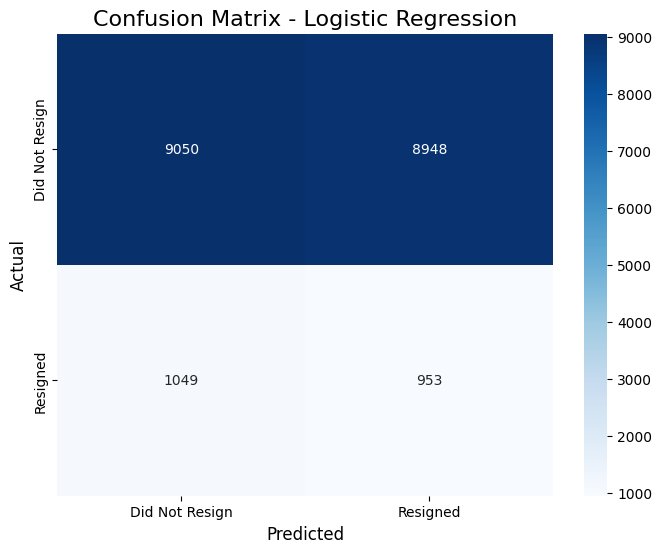

In [ ]:
# PART 4: VISUALIZE CONFUSION MATRICES FOR COMPARISON
# =================================================================

print("\n\n--- Generating Confusion Matrix Visualizations ---")

# For Logistic Regression (Balanced)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Resign', 'Resigned'],
            yticklabels=['Did Not Resign', 'Resigned'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()